# Setup (Run Saja)

Jalankan cell berikut tanpa mengubah kode

In [1]:
!pip install imbalanced-learn -q
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Import dari sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, ConfusionMatrixDisplay)

# Import dari imbalanced-learn
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Pengaturan visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load Dataset dari UCI (Run Saja)

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Memisahkan fitur dan target (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# Menampilkan metadata
print(chronic_kidney_disease.metadata)

# Menampilkan informasi variabel
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Periksa Bentuk dan Contoh Data (Lengkapi Code)

Petunjuk: Gunakan atribut .shape dan .head()

In [4]:
# TODO: Tampilkan bentuk (shape) dari X dan y
print(f"Bentuk X: {X.shape}")
print(f"Bentuk y: {y.shape}")

Bentuk X: (400, 24)
Bentuk y: (400, 1)


In [5]:
# TODO: Tampilkan 5 baris pertama fitur
print("\nFitur:")
print(X.head())

# TODO: Tampilkan 5 baris pertama target
print("\nTarget:")
print(y.head())


Fitur:
    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane  
0  121.0  ...  15.4  44.0  7800.0   5.2  yes  yes   no   good   no   no  
1    NaN  ...  11.3  38.0  6000.0   NaN   no   no   no   good   no   no  
2  423.0  ...   9.6  31.0  7500.0   NaN   no  yes   no   poor   no  yes  
3  117.0  ...  11.2  32.0  6700.0   3.9  yes   no   no   poor  yes  yes  
4  106.0  ...  11.6  35.0  7300.0   4.6   no   no   no   good   no   no  

[5 rows x 24 columns]

Target:
  class
0   ckd
1   ckd
2   ckd
3   ckd
4   ckd


Menggabungkan fitur dan target ke dalam satu DataFrame

In [6]:
# TODO: Gabungkan X dan y menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# Tampilkan 5 baris pertama
print(df.head())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]


Melihat tipe data, jumlah data kosong, dan ringkasan statistik dari dataset.
Kode berikut mengandung kesalahan.

*   Jalankan cell
*   Perbaiki kesalahan agar kode dapat dijalankan dengan benar

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [8]:
print(df.describe())

              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.7411

Pertanyaan Analisis
1. Apakah semua fitur bertipe numerik? Jelaskan.
Jawaban Anda:

Tidak, tidak semua fitur bertipe numerik.
Berdasarkan hasil df.info(), terdapat beberapa kolom yang memiliki tipe data object, yang menunjukkan bahwa kolom tersebut bersifat kategorikal atau berupa teks. Sementara itu, kolom lainnya bertipe int64 dan float64 yang termasuk dalam data numerik.

2. Apakah terdapat nilai kosong pada dataset? Pada kolom apa saja?
Jawaban Anda:

Ya, terdapat nilai kosong (missing values) pada dataset.
Hal ini terlihat dari perbedaan antara jumlah total data (400 baris) dengan jumlah non-null pada beberapa kolom yang jumlahnya tidak mencapai 400 kecuali class.

# Identifikasi Jenis Kolom

In [9]:
# Kolom numerik (berdasarkan konten, bukan dtype)
numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

# Kolom kategorikal
categorical_cols = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn',
                   'dm', 'cad', 'appet', 'pe', 'ane']

# Kolom target
target_col = 'class'

print(f"Kolom Numerik ({len(numeric_cols)}): {numeric_cols}\n")
print(f"Kolom Kategorikal ({len(categorical_cols)}): {categorical_cols}\n")
print(f"Target: {target_col}")

Kolom Numerik (11): ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

Kolom Kategorikal (13): ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

Target: class


# Menghitung Missing Values

In [10]:
# TODO: Hitung jumlah missing values tiap kolom
missing = df.isnull().sum()

# Persentase missing values
missing_pct = (missing / len(df)) * 100

# DataFrame ringkasan missing values
missing_df = pd.DataFrame({
    'Jumlah Missing': missing,
    'Percentage (%)': missing_pct
}).sort_values('Percentage (%)', ascending=False)

# Tampilkan kolom dengan missing values
missing_df = missing_df[missing_df['Jumlah Missing'] > 0]
print(missing_df)


       Jumlah Missing  Percentage (%)
rbc               152           38.00
rbcc              131           32.75
wbcc              106           26.50
pot                88           22.00
sod                87           21.75
pcv                71           17.75
pc                 65           16.25
hemo               52           13.00
su                 49           12.25
sg                 47           11.75
al                 46           11.50
bgr                44           11.00
bu                 19            4.75
sc                 17            4.25
bp                 12            3.00
age                 9            2.25
pcc                 4            1.00
ba                  4            1.00
htn                 2            0.50
dm                  2            0.50
cad                 2            0.50
appet               1            0.25
pe                  1            0.25
ane                 1            0.25


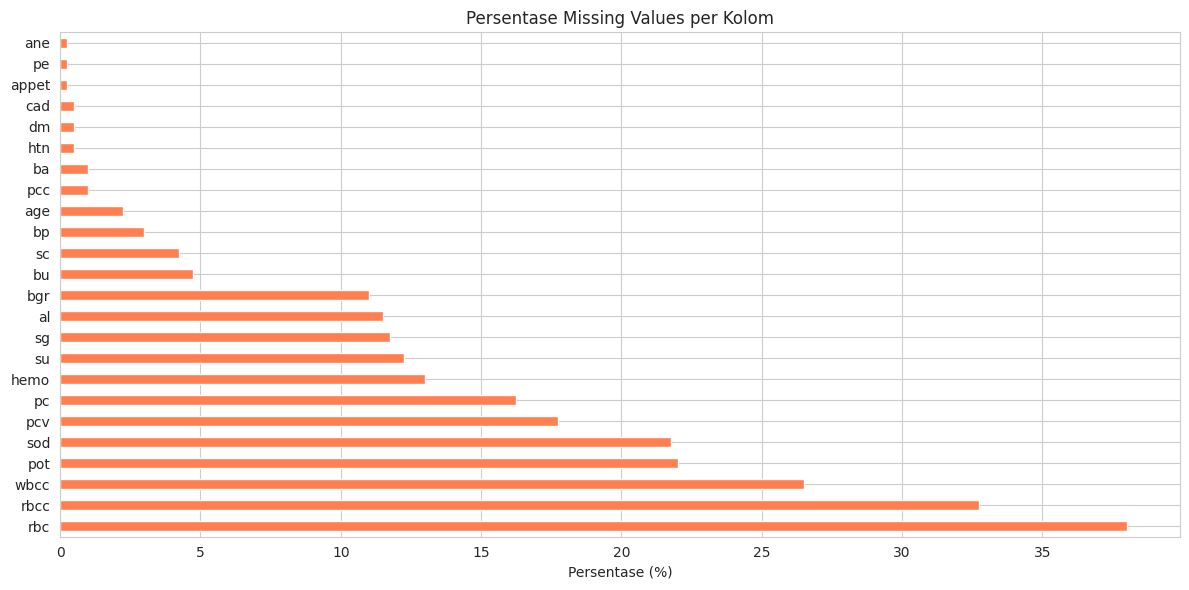


Total kolom dengan missing values: 24/25


In [11]:
# Visualisasi
plt.figure(figsize=(12, 6))
missing_df['Percentage (%)'].plot(kind='barh', color='coral')
plt.xlabel('Persentase (%)')
plt.title('Persentase Missing Values per Kolom')
plt.tight_layout()
plt.show()

print(f"\nTotal kolom dengan missing values: {len(missing_df)}/{len(df.columns)}")

# Pembersihan Data

In [12]:
# Salin dataset agar data asli tetap aman
df_cleaned = df.copy()

# Ganti simbol missing values menjadi NaN
df_cleaned = df_cleaned.replace(['?', '\t?', ' ?'], np.nan)

# Konversi kolom numerik ke tipe numerik
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Imputasi missing values numerik dengan median
for col in numeric_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f" {col}: filled with median = {median_val:.2f}")

print()

# Imputasi missing values kategorikal dengan modus
for col in categorical_cols + [target_col]:
    if df_cleaned[col].isnull().sum() > 0:
        modus_val = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(modus_val, inplace=True)
        print(f" {col}: filled with mode = '{modus_val}'")

print(f"\n Missing values setelah imputasi: {df_cleaned.isnull().sum().sum()}")


 age: filled with median = 55.00
 bp: filled with median = 80.00
 bgr: filled with median = 121.00
 bu: filled with median = 42.00
 sc: filled with median = 1.30
 sod: filled with median = 138.00
 pot: filled with median = 4.40
 hemo: filled with median = 12.65
 pcv: filled with median = 40.00
 wbcc: filled with median = 8000.00
 rbcc: filled with median = 4.80

 sg: filled with mode = '1.02'
 al: filled with mode = '0.0'
 su: filled with mode = '0.0'
 rbc: filled with mode = 'normal'
 pc: filled with mode = 'normal'
 pcc: filled with mode = 'notpresent'
 ba: filled with mode = 'notpresent'
 htn: filled with mode = 'no'
 dm: filled with mode = 'no'
 cad: filled with mode = 'no'
 appet: filled with mode = 'good'
 pe: filled with mode = 'no'
 ane: filled with mode = 'no'

 Missing values setelah imputasi: 0


In [13]:
# Cek duplikat
duplicates = df_cleaned.duplicated().sum()
print(f" Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("\nContoh data duplikat:")
    print(df_cleaned[df_cleaned.duplicated(keep=False)].head())

 Jumlah baris duplikat: 0


In [14]:
before_rows = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
after_rows = len(df_cleaned)

print(f"Baris sebelum: {before_rows}")
print(f"Baris sesudah: {after_rows}")
print(f"Baris yang dihapus: {before_rows - after_rows}")

Baris sebelum: 400
Baris sesudah: 400
Baris yang dihapus: 0


# Periksa Inkonsistensi Data

In [15]:
#cek inkonsistensi
print("Nilai unik untuk setiap kolom kategorikal:\n")
for col in categorical_cols + [target_col]:
    unique_vals = df_cleaned[col].unique()
    print(f"{col}: {unique_vals}")
    print(f"  → Jumlah: {len(unique_vals)}\n")

Nilai unik untuk setiap kolom kategorikal:

sg: [1.02  1.01  1.005 1.015 1.025]
  → Jumlah: 5

al: [1. 4. 2. 3. 0. 5.]
  → Jumlah: 6

su: [0. 3. 4. 1. 2. 5.]
  → Jumlah: 6

rbc: ['normal' 'abnormal']
  → Jumlah: 2

pc: ['normal' 'abnormal']
  → Jumlah: 2

pcc: ['notpresent' 'present']
  → Jumlah: 2

ba: ['notpresent' 'present']
  → Jumlah: 2

htn: ['yes' 'no']
  → Jumlah: 2

dm: ['yes' 'no' '\tno']
  → Jumlah: 3

cad: ['no' 'yes']
  → Jumlah: 2

appet: ['good' 'poor']
  → Jumlah: 2

pe: ['no' 'yes']
  → Jumlah: 2

ane: ['no' 'yes']
  → Jumlah: 2

class: ['ckd' 'ckd\t' 'notckd']
  → Jumlah: 3



Pertanyaan Pemahaman

Apakah terdapat nilai yang terlihat sama tetapi sebenarnya berbeda ataupun sebaliknya? Jelaskan!

Ya, terdapat nilai yang terlihat sama secara makna tetapi sebenarnya berbeda secara teknis, sehingga berpotensi menimbulkan inkonsistensi data.

Berdasarkan daftar nilai unik kolom kategorikal, ditemukan beberapa kasus penting:

Kolom dm
Terdapat nilai:

'no'
'\tno'

Secara semantik kedua nilai tersebut sama-sama bermakna “tidak”, namun secara teknis berbeda karena adanya karakter tab (\t) di depan nilai. Hal ini menyebabkan sistem menganggapnya sebagai dua kategori yang berbeda.

Kolom class
Terdapat nilai:

'ckd'
'ckd\t'

Kedua nilai tersebut memiliki makna yang sama, yaitu chronic kidney disease, tetapi dibedakan oleh adanya karakter tab di akhir string, sehingga terbaca sebagai dua kelas yang berbeda.

Implikasi terhadap analisis Inkonsistensi ini dapat:

- Menyebabkan jumlah kategori menjadi lebih banyak dari yang seharusnya
- Mengganggu proses encoding
- Menurunkan akurasi model akibat representasi kelas yang salah

Standarisasi Variabel Target (Run dan Amati)

In [16]:
print(" Standarisasi Target Variable:")
print(f"Before: {df_cleaned['class'].unique()}")
df_cleaned['class'] = df_cleaned['class'].replace({
    'ckd': 'ckd',
    'ckd\t': 'ckd',
    'notckd': 'notckd'
})
print(f"After: {df_cleaned['class'].unique()}\n")

# Standarisasi kolom kategorikal lainnya
standardization_map = {
    'rbc': {'normal': 'normal', 'abnormal': 'abnormal', '\tnormal': 'normal'},
    'pc': {'normal': 'normal', 'abnormal': 'abnormal', '\tnormal': 'normal'},
    'pcc': {'present': 'present', 'notpresent': 'notpresent', '\tnotpresent': 'notpresent'},
    'ba': {'present': 'present', 'notpresent': 'notpresent', '\tnotpresent': 'notpresent'},
    'htn': {'yes': 'yes', 'no': 'no', '\tyes': 'yes', '\tno': 'no'},
    'dm': {'yes': 'yes', 'no': 'no', '\tyes': 'yes', '\tno': 'no'},
    'cad': {'yes': 'yes', 'no': 'no', '\tyes': 'yes', '\tno': 'no'},
    'appet': {'good': 'good', 'poor': 'poor'},
    'pe': {'yes': 'yes', 'no': 'no'},
    'ane': {'yes': 'yes', 'no': 'no'}
}

for col, mapping in standardization_map.items():
    df_cleaned[col] = df_cleaned[col].replace(mapping)
    print(f" {col}: {df_cleaned[col].unique()}")

 Standarisasi Target Variable:
Before: ['ckd' 'ckd\t' 'notckd']
After: ['ckd' 'notckd']

 rbc: ['normal' 'abnormal']
 pc: ['normal' 'abnormal']
 pcc: ['notpresent' 'present']
 ba: ['notpresent' 'present']
 htn: ['yes' 'no']
 dm: ['yes' 'no']
 cad: ['no' 'yes']
 appet: ['good' 'poor']
 pe: ['no' 'yes']
 ane: ['no' 'yes']


Pertanyaan Pemahaman

Apa yang terjadi jika label target tidak distandarisasi?

Tanpa proses standarisasi label target, model berpotensi mempelajari pola yang keliru akibat adanya duplikasi kelas, yang pada akhirnya menurunkan validitas hasil pemodelan dan interpretasi penelitian.

# Encoding

In [17]:
df_encoded = df_cleaned.copy()

# TODO: Lakukan Label Encoding pada target
le_target = LabelEncoder()
df_encoded['class'] = le_target.fit_transform(df_encoded['class'])
print(f" Encoding target: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}\n")

# Identifikasi kolom binary vs multi-class
binary_cols = []
multiclass_cols = []

for col in categorical_cols:
    n_unique = df_encoded[col].nunique()
    if n_unique <= 2:
        binary_cols.append(col)
    else:
        multiclass_cols.append(col)

print(f" Kolom Biner ({len(binary_cols)}): {binary_cols}")
print(f" Kolom Multikelas ({len(multiclass_cols)}): {multiclass_cols}\n")

# Label Encoding untuk kolom biner
le_dict = {}
for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le
    print(f" {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# One-Hot Encoding untuk multi-class columns
if len(multiclass_cols) > 0:
    print(f"\n One-Hot Encoding for: {multiclass_cols}")
    df_encoded = pd.get_dummies(df_encoded, columns=multiclass_cols, drop_first=True)

print(f"\n Shape after encoding: {df_encoded.shape}")
print(df_encoded.head())

 Encoding target: {'ckd': np.int64(0), 'notckd': np.int64(1)}

 Kolom Biner (10): ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
 Kolom Multikelas (3): ['sg', 'al', 'su']

 rbc: {'abnormal': np.int64(0), 'normal': np.int64(1)}
 pc: {'abnormal': np.int64(0), 'normal': np.int64(1)}
 pcc: {'notpresent': np.int64(0), 'present': np.int64(1)}
 ba: {'notpresent': np.int64(0), 'present': np.int64(1)}
 htn: {'no': np.int64(0), 'yes': np.int64(1)}
 dm: {'no': np.int64(0), 'yes': np.int64(1)}
 cad: {'no': np.int64(0), 'yes': np.int64(1)}
 appet: {'good': np.int64(0), 'poor': np.int64(1)}
 pe: {'no': np.int64(0), 'yes': np.int64(1)}
 ane: {'no': np.int64(0), 'yes': np.int64(1)}

 One-Hot Encoding for: ['sg', 'al', 'su']

 Shape after encoding: (400, 36)
    age    bp  rbc  pc  pcc  ba    bgr    bu   sc    sod  ...  al_1.0  al_2.0  \
0  48.0  80.0    1   1    0   0  121.0  36.0  1.2  138.0  ...    True   False   
1   7.0  50.0    1   1    0   0  121.0  18.0  0.8  138.0  ...   

# Pemisahan Fitur dan Target

In [18]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Identifikasi Fitur Numerik Asli dan Fitur Hasil Encoding

In [19]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Pisahkan kolom asli numerik vs encoded
original_numeric = [col for col in numeric_features if col in numeric_cols]
encoded_features = [col for col in numeric_features if col not in numeric_cols]

print(f"Fitur Numerik Asli ({len(original_numeric)}): {original_numeric}\n")
print(f"Fitur Hasil Encoding ({len(encoded_features)}): {encoded_features}\n")
print(f"Total Fitur: {len(numeric_features)}")

Fitur Numerik Asli (11): ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

Fitur Hasil Encoding (10): ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

Total Fitur: 21


# Deteksi dan Handling Outlier

Gunakan nilai kuartil 25%, 75%, dan konstanta standar metode IQR.

 HASIL DETEKSI OUTLIER

      count  percentage  lower_bound  upper_bound
rbcc   75.0       18.75       3.6000       6.0000
sc     53.0       13.25      -1.8375       5.4625
bgr    53.0       13.25      27.5000     223.5000
bu     41.0       10.25     -25.1250     113.8750
bp     36.0        9.00      55.0000      95.0000
sod    18.0        4.50     126.0000     150.0000
wbcc   17.0        4.25    3337.5000   13037.5000
pot    14.0        3.50       2.8000       6.0000
age    10.0        2.50       9.0000      97.0000
pcv     6.0        1.50      19.0000      59.0000
hemo    2.0        0.50       5.2500      20.2500


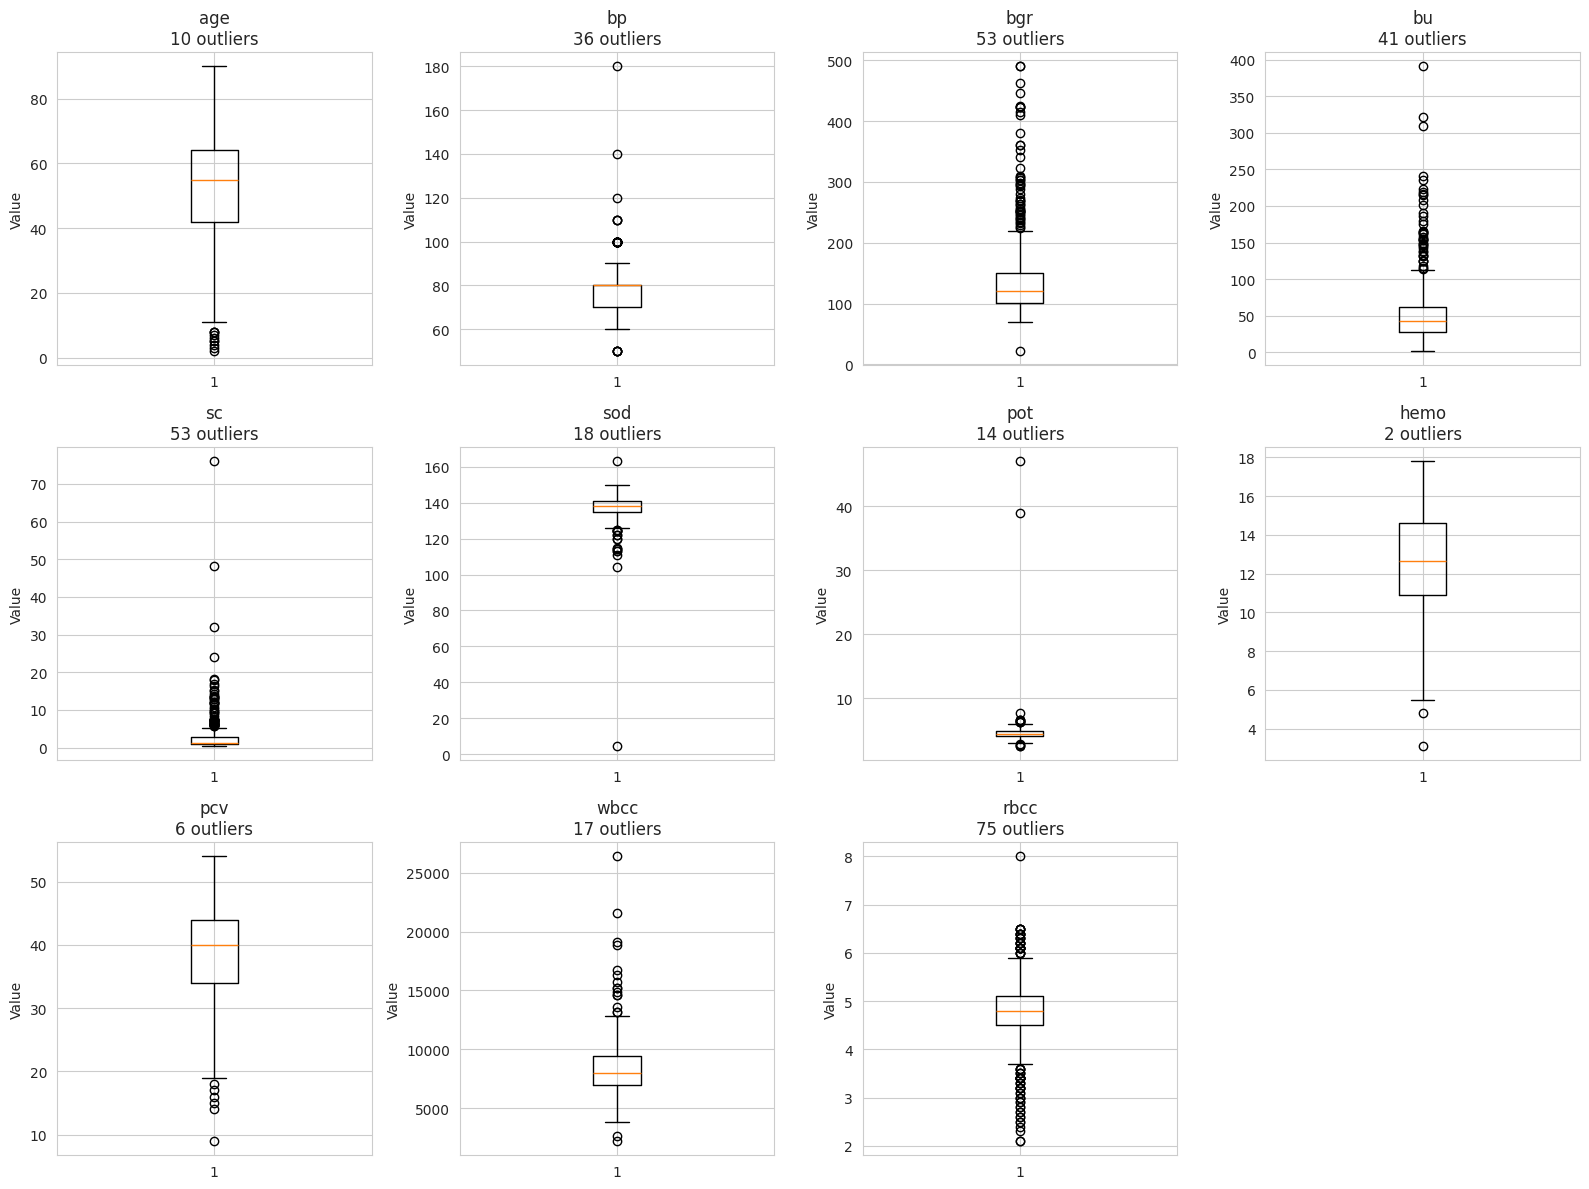

In [20]:
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
    return outlier_info

# Deteksi outlier hanya pada kolom numerik asli
outlier_results = detect_outliers_iqr(X, original_numeric)

# Tampilkan hasil
print(" HASIL DETEKSI OUTLIER\n")
outlier_df = pd.DataFrame(outlier_results).T
outlier_df = outlier_df[['count', 'percentage', 'lower_bound', 'upper_bound']]
outlier_df = outlier_df.sort_values('percentage', ascending=False)
print(outlier_df)

# Visualisasi boxplot
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(original_numeric):
    axes[idx].boxplot(X[col].dropna())
    axes[idx].set_title(f'{col}\n{outlier_results[col]["count"]} outliers')
    axes[idx].set_ylabel('Value')

# Sembunyikan subplot kosong
for idx in range(len(original_numeric), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [35]:
# Lakukan penanganan handling dan bagaimana cara Anda menganalisisnya
# Anda boleh menambahkan metode lain untuk analisisnya

X_no_outliers = X.copy()

# Fitur diskrit yang dikecualikan dari penanganan outlier
discrete_features = ['wbcc', 'rbcc']

# Kolom yang akan ditangani outliernya
cols_to_handle = [col for col in original_numeric if col not in discrete_features]

print(f"Menangani outlier untuk: {cols_to_handle}")
print(f"Mengecualikan fitur diskrit: {discrete_features}\n")

for col in cols_to_handle:
    lower_bound = outlier_results[col]['lower_bound']
    upper_bound = outlier_results[col]['upper_bound']

    # Capping
    before_outliers = len(X_no_outliers[(X_no_outliers[col] < lower_bound) |
                                         (X_no_outliers[col] > upper_bound)])

    X_no_outliers[col] = np.clip(X_no_outliers[col], lower_bound, upper_bound)

    after_outliers = len(X_no_outliers[(X_no_outliers[col] < lower_bound) |
                                        (X_no_outliers[col] > upper_bound)])

    print(f" {col}: {before_outliers} outliers ditangani")

Menangani outlier untuk: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']
Mengecualikan fitur diskrit: ['wbcc', 'rbcc']

 age: 0 outliers ditangani
 bp: 0 outliers ditangani
 bgr: 0 outliers ditangani
 bu: 0 outliers ditangani
 sc: 0 outliers ditangani
 sod: 0 outliers ditangani
 pot: 0 outliers ditangani
 hemo: 0 outliers ditangani
 pcv: 0 outliers ditangani


In [36]:
X = X_no_outliers.copy()

# Heatmap Correlation

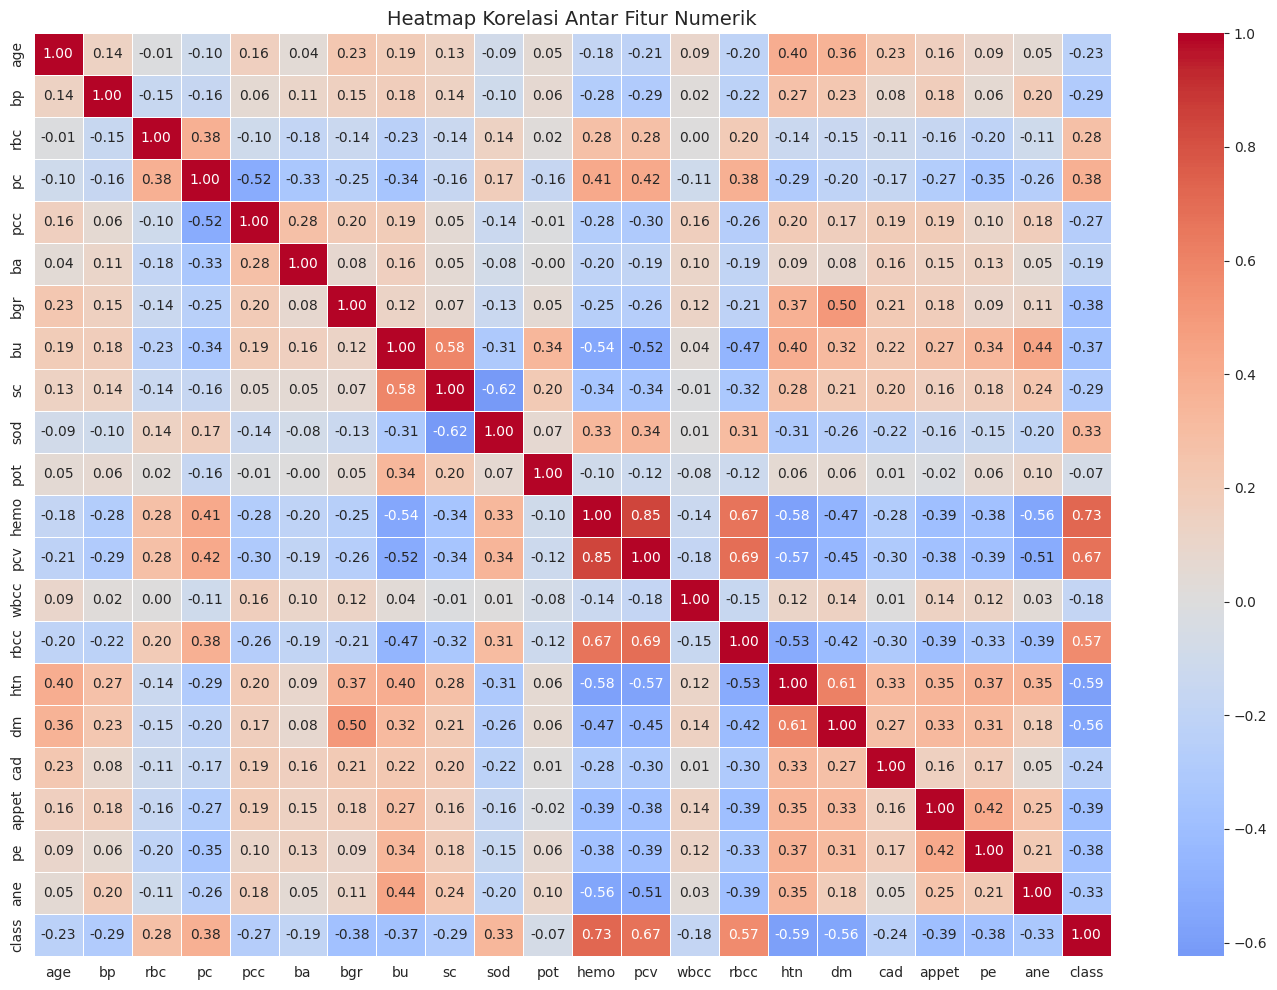

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
corr_matrix = df_encoded.select_dtypes(include=['int64', 'float64']).corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan heatmap korelasi, ditemukan adanya hubungan yang cukup kuat antar beberapa fitur laboratorium, serta korelasi yang signifikan antara fitur tertentu dengan variabel target. Hal ini menunjukkan bahwa fitur-fitur tersebut berpotensi besar dalam proses klasifikasi penyakit ginjal kronis, namun juga mengindikasikan adanya multikolinearitas yang perlu dipertimbangkan pada pemilihan model.

# Train-Test Split

In [38]:
print(f"\nTrain-Test Split: 80% - 20%")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Train-Test Split: 80% - 20%
Training set: (320, 35)
Test set: (80, 35)


 DISTRIBUSI KELAS

Training Set:
  Class 0 (notckd): 200 (62.50%)
  Class 1 (ckd): 120 (37.50%)
  Imbalance Ratio: 0.60



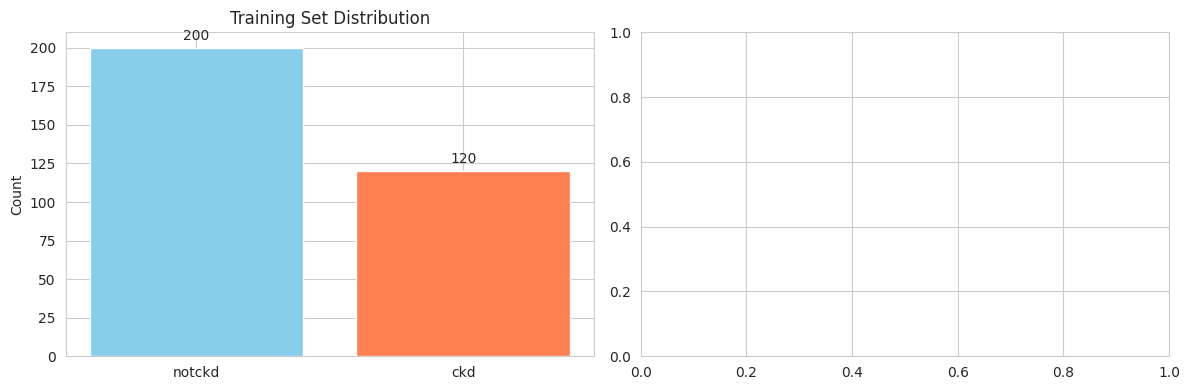

In [39]:
# Distribusi di training set
train_dist = y_train.value_counts()
train_pct = y_train.value_counts(normalize=True) * 100

print(" DISTRIBUSI KELAS\n")
print("Training Set:")
print(f"  Class 0 (notckd): {train_dist[0]} ({train_pct[0]:.2f}%)")
print(f"  Class 1 (ckd): {train_dist[1]} ({train_pct[1]:.2f}%)")
print(f"  Imbalance Ratio: {train_dist[1]/train_dist[0]:.2f}\n")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(['notckd', 'ckd'], train_dist.values, color=['skyblue', 'coral'])
axes[0].set_title('Training Set Distribution')
axes[0].set_ylabel('Count')
for i, v in enumerate(train_dist.values):
    axes[0].text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Resampling

RESAMPLING METHODS COMPARISON

Original:
  Total samples: 320
  Class 0: 200 (62.5%)
  Class 1: 120 (37.5%)

Random Over-Sampling:
  Total samples: 400
  Class 0: 200 (50.0%)
  Class 1: 200 (50.0%)

SMOTE:
  Total samples: 400
  Class 0: 200 (50.0%)
  Class 1: 200 (50.0%)

ADASYN:
  Total samples: 395
  Class 0: 200 (50.6%)
  Class 1: 195 (49.4%)

SMOTE + Tomek:
  Total samples: 380
  Class 0: 190 (50.0%)
  Class 1: 190 (50.0%)



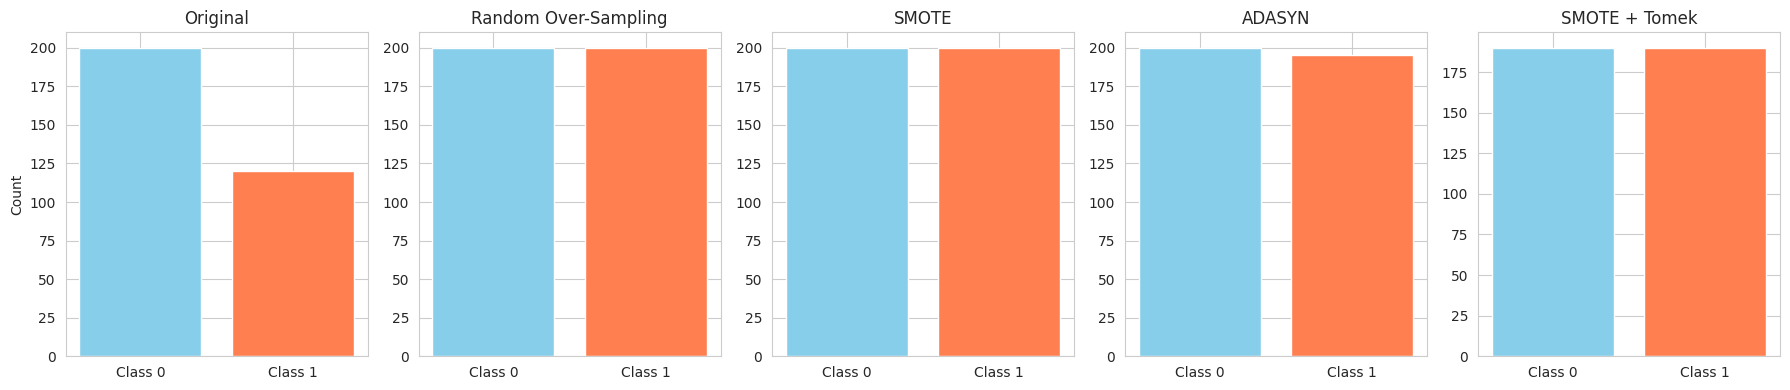

In [40]:
# Dictionary untuk menyimpan hasil
resampling_results = {}

# 1. Original (No Resampling)
resampling_results['Original'] = {
    'X_train': X_train,
    'y_train': y_train,
    'class_dist': y_train.value_counts().to_dict()
}

# 2. Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
resampling_results['Random Over-Sampling'] = {
    'X_train': X_ros,
    'y_train': y_ros,
    'class_dist': y_ros.value_counts().to_dict()
}

# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
resampling_results['SMOTE'] = {
    'X_train': X_smote,
    'y_train': y_smote,
    'class_dist': y_smote.value_counts().to_dict()
}

# 4. ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
resampling_results['ADASYN'] = {
    'X_train': X_adasyn,
    'y_train': y_adasyn,
    'class_dist': y_adasyn.value_counts().to_dict()
}

# 5. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
resampling_results['SMOTE + Tomek'] = {
    'X_train': X_smote_tomek,
    'y_train': y_smote_tomek,
    'class_dist': y_smote_tomek.value_counts().to_dict()
}

# Tampilkan hasil
print("RESAMPLING METHODS COMPARISON\n")
for method, data in resampling_results.items():
    dist = data['class_dist']
    total = sum(dist.values())
    print(f"{method}:")
    print(f"  Total samples: {total}")
    print(f"  Class 0: {dist.get(0, 0)} ({dist.get(0, 0)/total*100:.1f}%)")
    print(f"  Class 1: {dist.get(1, 0)} ({dist.get(1, 0)/total*100:.1f}%)")
    print()

# Visualisasi
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
for idx, (method, data) in enumerate(resampling_results.items()):
    dist = data['class_dist']
    axes[idx].bar(['Class 0', 'Class 1'], [dist.get(0, 0), dist.get(1, 0)],
                  color=['skyblue', 'coral'])
    axes[idx].set_title(method)
    axes[idx].set_ylabel('Count' if idx == 0 else '')

plt.tight_layout()
plt.show()

In [41]:
# Pilih dan sesuaikan metode resampling yang ingin Anda gunakan
X_train_balanced = X_smote
y_train_balanced = y_smote

# Scaling

In [42]:
# hanya untuk knn
# Scaling untuk model berbasis jarak
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data scaled successfully!")
print(f"Training set (scaled): {X_train_scaled.shape}")
print(f"Test set (scaled): {X_test_scaled.shape}")

Data scaled successfully!
Training set (scaled): (400, 35)
Test set (scaled): (80, 35)


Jelaskan mengapa fit_transform hanya dilakukan pada X_train_balanced dan bukan pada X_test

fit_transform hanya dilakukan pada X_train_balanced dan bukan pada X_test karena untuk mencegah data leakage dan menjaga validitas evaluasi model.

# Modeling

In [43]:
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1)
}

for name, model in models.items():
    print(f"  • {name}: {type(model).__name__}")

  • Naive Bayes: GaussianNB
  • Decision Tree: DecisionTreeClassifier
  • KNN: KNeighborsClassifier
  • Random Forest: RandomForestClassifier


In [44]:
#training models
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...", end=" ")

    # Lengkapi bagian _____ agar hanya model KNN yang menggunakan data hasil scaling saat training
    if name == "KNN":
        model.fit(X_train_scaled, y_train_balanced)
    else:
        model.fit(X_train_balanced, y_train_balanced)

    trained_models[name] = model

Training Naive Bayes... Training Decision Tree... Training KNN... Training Random Forest... 

In [45]:
predictions = {}

for name, model in trained_models.items():
    if name == 'KNN':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    predictions[name] = y_pred
    print(f" {name}: Predictions made")

 Naive Bayes: Predictions made
 Decision Tree: Predictions made
 KNN: Predictions made
 Random Forest: Predictions made


NAIVE BAYES

Accuracy: 0.9875 (98.75%)

Confusion Matrix:
[[49  1]
 [ 0 30]]

Classification Report:
              precision    recall  f1-score   support

      notckd       1.00      0.98      0.99        50
         ckd       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



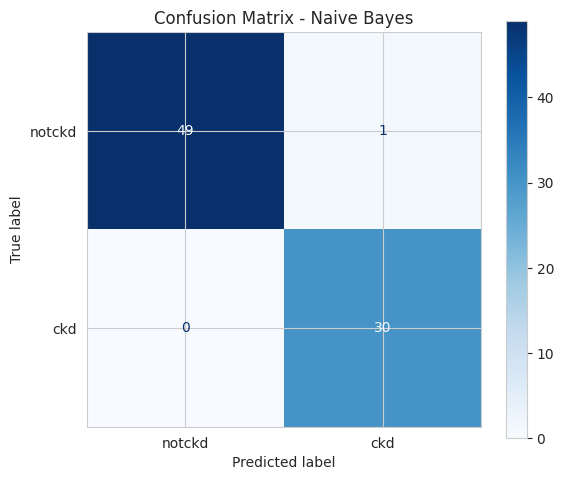


DECISION TREE

Accuracy: 0.9750 (97.50%)

Confusion Matrix:
[[50  0]
 [ 2 28]]

Classification Report:
              precision    recall  f1-score   support

      notckd       0.96      1.00      0.98        50
         ckd       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



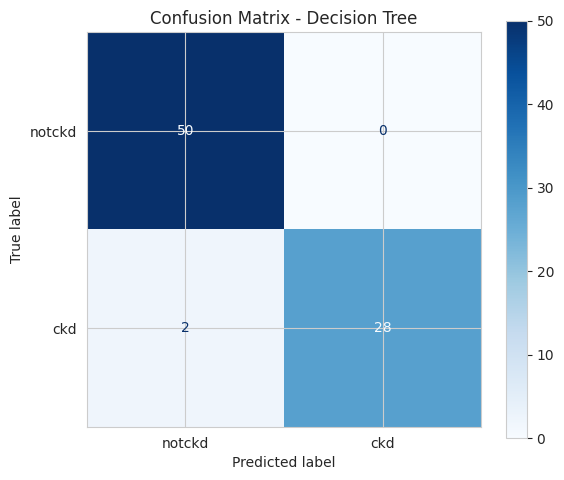


KNN

Accuracy: 0.9750 (97.50%)

Confusion Matrix:
[[48  2]
 [ 0 30]]

Classification Report:
              precision    recall  f1-score   support

      notckd       1.00      0.96      0.98        50
         ckd       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



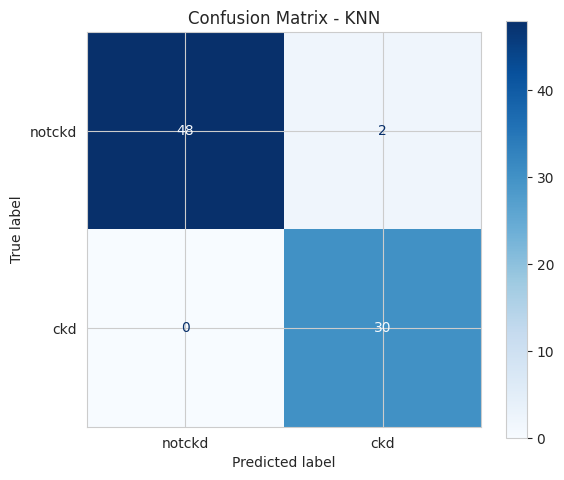


RANDOM FOREST

Accuracy: 0.9750 (97.50%)

Confusion Matrix:
[[50  0]
 [ 2 28]]

Classification Report:
              precision    recall  f1-score   support

      notckd       0.96      1.00      0.98        50
         ckd       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



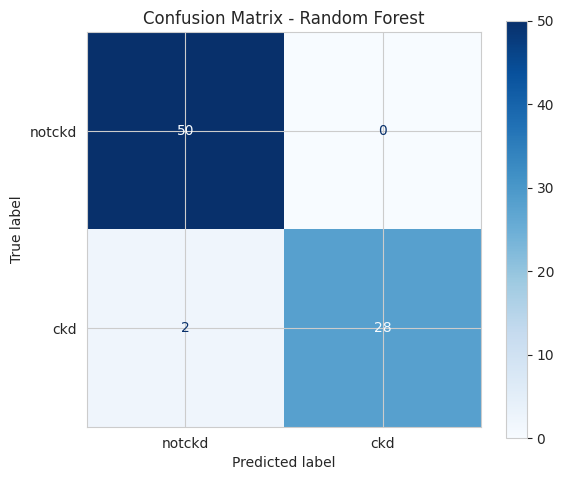

In [46]:
evaluation_results = {}

for name, y_pred in predictions.items():
    print("=" * 60)
    print(f"{name.upper()}")
    print("=" * 60)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.4f} ({acc*100:.2f}%)")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    # Classification Report
    print(f"\nClassification Report:")
    report = classification_report(y_test, y_pred, target_names=['notckd', 'ckd'])
    print(report)

    # Store results
    evaluation_results[name] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

    # Visualize Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    ConfusionMatrixDisplay(cm, display_labels=['notckd', 'ckd']).plot(ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

    print()

MODEL PERFORMANCE COMPARISON
        Model  Accuracy  Precision   Recall  F1-Score
  Naive Bayes    0.9875   0.967742 1.000000  0.983607
Decision Tree    0.9750   1.000000 0.933333  0.965517
          KNN    0.9750   0.937500 1.000000  0.967742
Random Forest    0.9750   1.000000 0.933333  0.965517


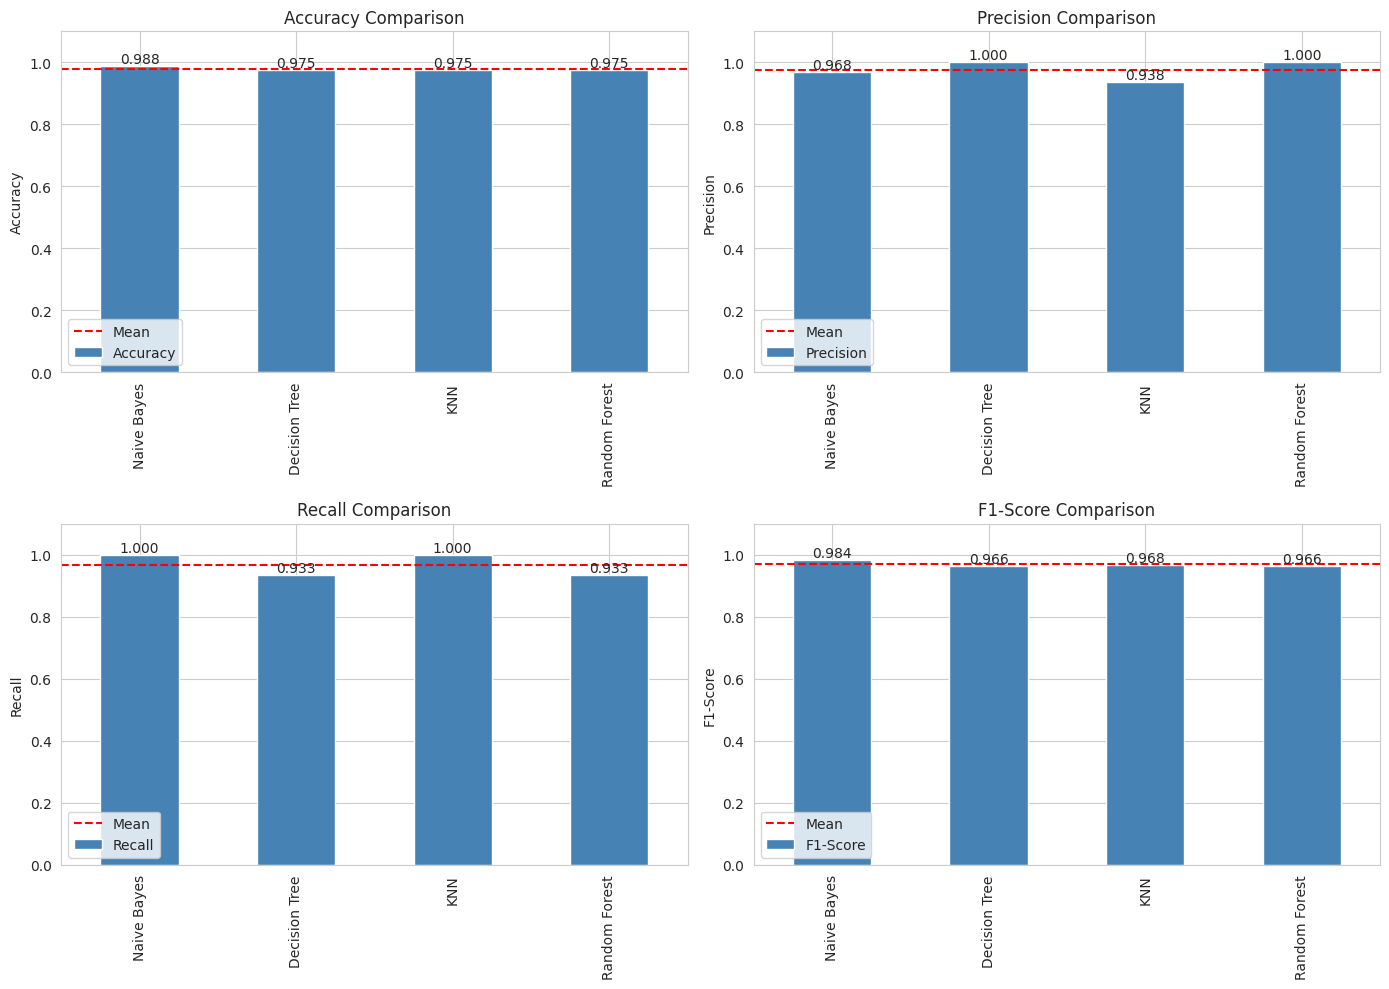

In [47]:
# Create comparison DataFrame
comparison_data = []
for name, results in evaluation_results.items():
    cm = results['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()

    accuracy = results['accuracy']
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    comparison_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("MODEL PERFORMANCE COMPARISON")
print("=" * 70)
print(comparison_df.to_string(index=False))
print("=" * 70)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color='steelblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_ylim([0, 1.1])
    ax.axhline(y=comparison_df[metric].mean(), color='r', linestyle='--', label='Mean')

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')

    ax.legend()

plt.tight_layout()
plt.show()

Bagaimana perbedaan hasil menggunakan metode yang berbeda? Ceritakan temuanmu!

Berdasarkan hasil pengujian empat algoritma (Naive Bayes, Decision Tree, KNN, dan Random Forest), terlihat bahwa seluruh metode mampu memberikan performa yang sangat tinggi dalam klasifikasi penyakit ginjal kronis (CKD). Namun, terdapat perbedaan karakteristik kinerja pada masing-masing model.

Naive Bayes menunjukkan performa terbaik secara keseluruhan dengan akurasi tertinggi sebesar 98,75%. Model ini hanya melakukan satu kesalahan pada kelas *notckd* dan tidak melakukan kesalahan sama sekali pada kelas *ckd*. Hal ini tercermin dari nilai recall untuk kelas *ckd* yang mencapai 1.00, artinya seluruh pasien CKD berhasil terdeteksi. F1-score yang tinggi pada kedua kelas menunjukkan keseimbangan yang baik antara precision dan recall.

Decision Tree, KNN, dan Random Forest memiliki akurasi yang sama, yaitu 97,50%. Meskipun sedikit lebih rendah dibanding Naive Bayes, ketiganya tetap menunjukkan performa yang sangat baik. Decision Tree dan Random Forest memiliki pola kesalahan yang sama, yaitu salah mengklasifikasikan dua data CKD sebagai *notckd*. Hal ini menyebabkan nilai recall kelas *ckd* turun menjadi 0.93, meskipun precision-nya tetap sempurna (1.00). Artinya, ketika model memprediksi *ckd*, hasilnya sangat akurat, tetapi masih ada beberapa kasus CKD yang terlewat.

KNN memiliki karakteristik berbeda: tidak ada kesalahan pada kelas *ckd* (recall = 1.00), tetapi terdapat dua kesalahan pada kelas *notckd*. Ini membuat precision untuk kelas *ckd* menurun menjadi 0.94 karena adanya prediksi *ckd* yang sebenarnya bukan CKD. Dengan kata lain, KNN cenderung lebih “sensitif” terhadap CKD, tetapi sedikit mengorbankan ketepatan prediksi.

Secara umum, semua metode layak digunakan karena performanya sangat tinggi. Namun, jika tujuan utama adalah meminimalkan risiko pasien CKD tidak terdeteksi, maka Naive Bayes dan KNN lebih unggul karena memiliki recall 100% pada kelas *ckd*. Di antara semuanya, Naive Bayes menjadi metode paling stabil dan optimal karena memberikan akurasi tertinggi sekaligus keseimbangan terbaik antara precision, recall, dan F1-score.


# Hyperparamer Tuning (Opsional)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train_balanced)

print("Best Parameters:", grid_knn.best_params_)
print("Best Recall:", grid_knn.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Recall: 1.0


Setelah Anda selesai melakukan hands-on coding, silakan ceritakan kembali apa saja proses yang sudah Anda lakukan.
Jawaban Anda:

1. Setup dan Pemuatan Dataset

Proses dimulai dengan melakukan setup lingkungan kerja dan memuat dataset Chronic Kidney Disease (CKD). Dataset kemudian diperiksa untuk memahami struktur data, jumlah baris dan kolom, serta tipe data setiap fitur.

2. Eksplorasi dan Pemahaman Data

Saya melakukan eksplorasi awal dengan:

- Melihat contoh data dan statistik deskriptif
- Mengidentifikasi fitur numerik dan kategorikal
- Memahami distribusi target (ckd dan notckd)

Tahap ini bertujuan untuk memperoleh gambaran awal mengenai kondisi dan karakteristik data.

3. Pembersihan dan Pra-pemrosesan Data

Pada tahap ini dilakukan beberapa langkah penting, yaitu:

- Menangani nilai hilang (missing values) menggunakan strategi yang sesuai
- Mengatasi inkonsistensi data dan kesalahan penulisan
- Melakukan encoding pada fitur kategorikal agar dapat diproses oleh model   machine learning
- Memastikan seluruh fitur berada dalam format numerik

4. Pemisahan Fitur dan Target

Data kemudian dipisahkan menjadi:

- Fitur (X) sebagai variabel independen
- Target (y) sebagai label klasifikasi (CKD / non-CKD)
- Langkah ini penting untuk menjaga kejelasan alur pemodelan.

5. Penanganan Ketidakseimbangan Data

Karena dataset memiliki distribusi kelas yang tidak seimbang, saya melakukan teknik resampling pada data training untuk menyeimbangkan jumlah data antar kelas. Langkah ini bertujuan agar model tidak bias terhadap kelas mayoritas.

6. Train-Test Split

Dataset dibagi menjadi data training dan data testing agar performa model dapat diuji pada data yang belum pernah dilihat sebelumnya, sehingga evaluasi menjadi lebih objektif.

7. Scaling Data (Khusus untuk KNN)

Saya melakukan proses scaling menggunakan StandardScaler, namun hanya diterapkan pada data training dan testing yang digunakan oleh model berbasis jarak, yaitu KNN. Proses fit hanya dilakukan pada data training untuk menghindari data leakage.

8. Pembangunan dan Training Model

Beberapa algoritma klasifikasi dilatih, yaitu:

- Naive Bayes
- Decision Tree
- K-Nearest Neighbors (KNN)
- Random Forest

Khusus KNN, model dilatih menggunakan data hasil scaling, sedangkan model lain menggunakan data asli tanpa scaling.

9. Prediksi dan Evaluasi Model

Setiap model dievaluasi menggunakan beberapa metrik, yaitu:

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

Hasil evaluasi juga divisualisasikan dalam bentuk confusion matrix dan grafik perbandingan performa antar model.

10. Analisis dan Perbandingan Hasil

Saya membandingkan performa setiap model dan menemukan bahwa:

- Naive Bayes memberikan performa terbaik secara keseluruhan dengan accuracy dan recall tertinggi
- KNN sangat baik dalam mendeteksi seluruh kasus CKD, namun menghasilkan lebih banyak false positive
- Decision Tree dan Random Forest memiliki precision tinggi, tetapi recall lebih rendah

Analisis ini menegaskan pentingnya memilih model berdasarkan konteks permasalahan, terutama pada domain medis yang memprioritaskan recall.

11. Hyperparameter Tuning (Opsional)

Sebagai pendalaman, saya juga melakukan hyperparameter tuning menggunakan GridSearchCV untuk memahami pengaruh parameter terhadap performa model, khususnya pada KNN dan Random Forest.